In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [18]:
dataset = pd.read_csv("SpotifyFeatures.csv")

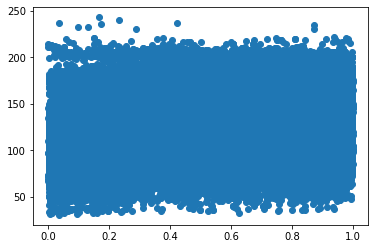

In [19]:
plt.scatter(dataset['energy'], dataset['tempo'] )

In [20]:
def numCluster():
      kRange = range(1, 10)
      sumSquareError = []

      for k in kRange:
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(dataset[['energy', 'tempo']])
            sumSquareError.append(kmeans.inertia_)
            
      plt.xlabel("Number of K")
      plt.ylabel("Sum of Squared Error")

      plt.plot(kRange, sumSquareError, 'bx-')


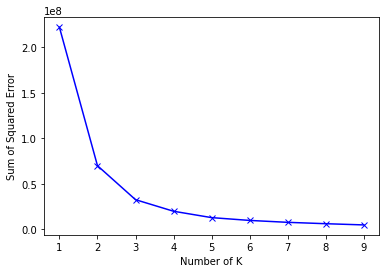

In [21]:
numCluster()

In [22]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(dataset[['energy', 'tempo']])
# y_predicted = kmeans.fit_predict(dataset[[
#             'popularity', 'acousticness', 'danceability', 'energy', 
#             'instrumentalness', 'liveness', 'loudness', 'speechiness',
#             'tempo', 'valence'
#       ]])


In [23]:
kmeans.cluster_centers_

array([[  0.65839579, 166.43983595],
       [  0.5203723 ,  88.42866223],
       [  0.58491199, 126.51735776]])

In [24]:
def plotKmeans():     
      datasetDict = {}

      for i in range(0, 10):
            datasetDict["dataset%s" %i] = dataset[dataset.cluster == i]

      color = ['#FF6347', '#7CFC00', '#4169E1']

      for i in range(0, 3):
            plt.scatter(datasetDict["dataset%s" %i].energy, datasetDict["dataset%s" %i].tempo, c = color[i])

      plt.ylabel("tempo")
      plt.xlabel("energy")
      plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = '#000', marker='*', label='centroid')
      plt.legend()

In [25]:
dataset['cluster'] = y_predicted

c:\Users\nhatt\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


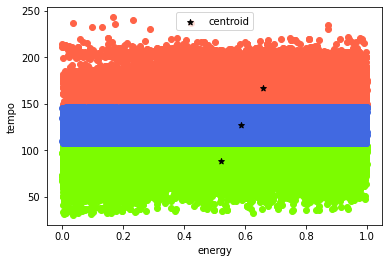

In [26]:
plotKmeans()

In [27]:
scaler = MinMaxScaler()

scaler.fit(dataset[['tempo']])
dataset[['tempo']] = scaler.transform(dataset[['tempo']])

scaler.fit(dataset[['energy']])
dataset[['energy']] = scaler.transform(dataset[['energy']])

# scaler.fit(dataset[[ 'popularity', 'acousticness', 'danceability', 'energy', 
#             'instrumentalness', 'liveness', 'loudness', 'speechiness',
#             'tempo', 'valence']])
# dataset[[ 
#       'popularity', 'acousticness', 'danceability', 'energy', 
#             'instrumentalness', 'liveness', 'loudness', 'speechiness',
#             'tempo', 'valence'
#             ]] = scaler.transform(dataset[[ 'popularity', 'acousticness', 'danceability', 'energy', 
#                                                                                     'instrumentalness', 'liveness', 'loudness', 'speechiness',
#                                                                                     'tempo', 'valence']])

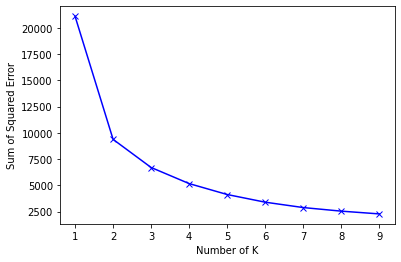

In [28]:
numCluster()

In [29]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(dataset[['energy', 'tempo']])

In [30]:
dataset['cluster'] = y_predicted

In [31]:
kmeans.cluster_centers_

array([[0.83153653, 0.45273689],
       [0.54079629, 0.40308344],
       [0.18884633, 0.35327672]])

c:\Users\nhatt\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


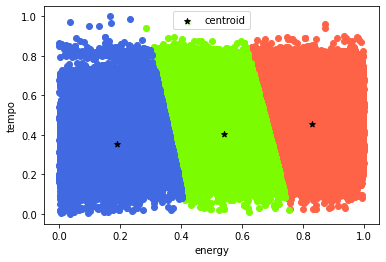

In [32]:
plotKmeans()